<a href="https://colab.research.google.com/github/DevanWestley/SleepDisorderAnalysis/blob/main/Sleep_Disorder_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Made By: Devan Westley - Teknologi Informasi 23**

## **Import Package yang Dibutuhkan**

In [ ]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## **Menampilkan Informasi yang Diperlukan**

In [ ]:
df = pd.read_csv('SleepDisorder.csv')
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Sleep Disorder
0,Male,27,6.1,6,42,6,Overweight,77,None
1,Male,28,6.2,6,60,8,Normal,75,None
2,Male,28,6.2,6,60,8,Normal,75,None
3,Male,28,5.9,4,30,8,Obese,85,Sleep Apnea
4,Male,28,5.9,4,30,8,Obese,85,Sleep Apnea


In [ ]:
# Ukuran dataset
df.shape

(374, 9)

In [ ]:
# Menampilkan nama-nama kolom pada dataset ini
df.columns

Index(['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
# Menampilkan jenis tipe data pada setiap kolom
df.dtypes

Gender                      object
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                   int64
Sleep Disorder              object
dtype: object

In [ ]:
df.isnull().sum()

Gender                     0
Age                        0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Sleep Disorder             0
dtype: int64

Tidak ada yang null

## **Cek apakah ada outlier**

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

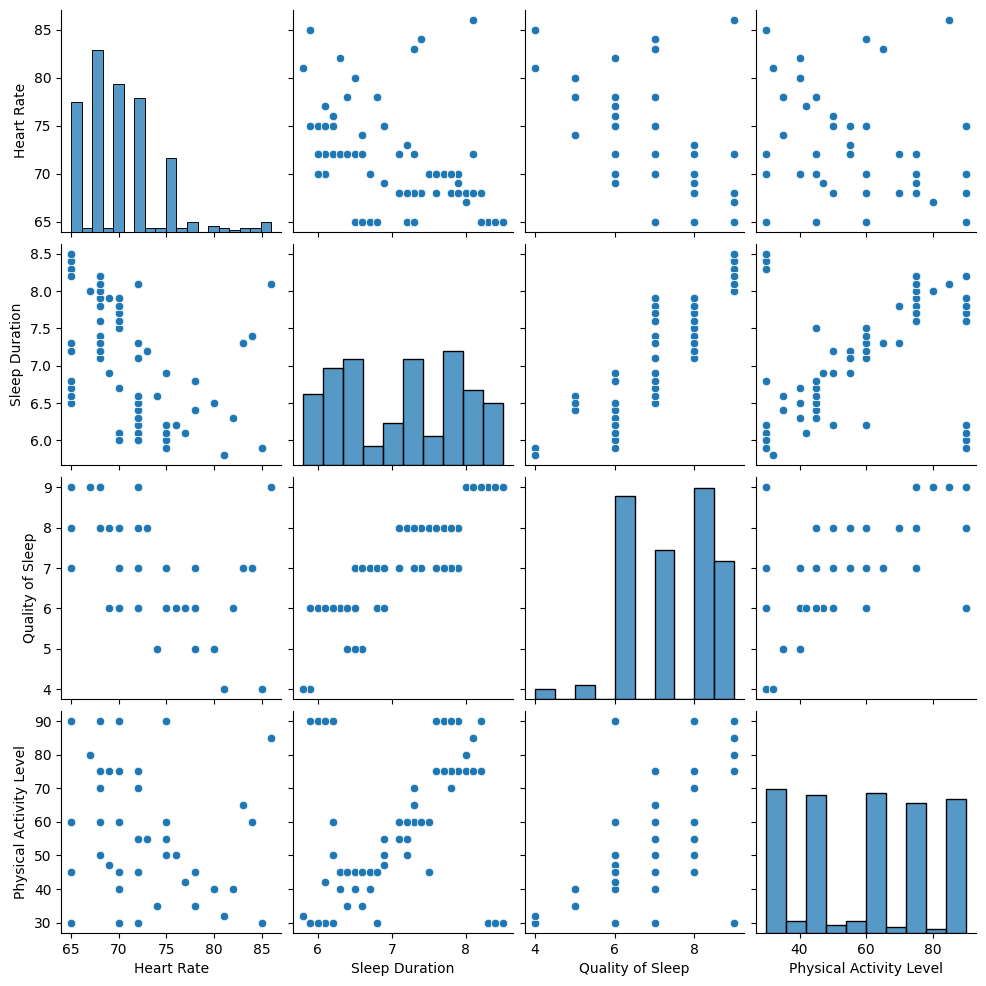

In [ ]:
plot = ['Heart Rate', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level']
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[plot])
plt.show()

Tidak ada outlier

## **Encoding menggunakan Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
kolom_kategorikal = ['Gender', 'BMI Category', 'Sleep Disorder']

LE = LabelEncoder()

for kolom in kolom_kategorikal:
  df[kolom] = LE.fit_transform(df[kolom])

In [ ]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Sleep Disorder
0,1,27,6.1,6,42,6,3,77,1
1,1,28,6.2,6,60,8,0,75,1
2,1,28,6.2,6,60,8,0,75,1
3,1,28,5.9,4,30,8,2,85,2
4,1,28,5.9,4,30,8,2,85,2


## **Split Data untuk Persiapan Modeling**

In [ ]:
X = df.drop(['Sleep Disorder'], axis=1)
y = df['SlSleepeep Disorder']

## **Normalisasi menggunakan Standard Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

Evaluasi Akurasi

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
akurasi_train = accuracy_score(y_train, y_pred_train)
akurasi_test = accuracy_score(y_test, y_pred_test)

print("Akurasi data train =", akurasi_train)
print("Akurasi data test =", akurasi_test)

Akurasi data train = 0.8762541806020067
Akurasi data test = 0.9333333333333333
